In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from tqdm import tqdm

In [2]:
sens_path = '/content/sensitivity_analysis.csv'
grad_path = '/content/gradient_saliency.csv'
graph_path = '/content/graph_masking.csv'
shap_path = '/content/shap.csv'

sens_df = pd.read_csv(sens_path)
grad_df = pd.read_csv(grad_path)
graph_df = pd.read_csv(graph_path)
shap_df = pd.read_csv(shap_path)

# Figure A

In [ ]:
shap_top = shap_df['feature_name'][:30].values
sens_top = sens_df['features'][:30].values
grad_top = grad_df['features'][:30].values
graph_top = graph_df['features'][:30].values

In [ ]:
set_shap = set(shap_top)
set_sens = set(sens_top)
set_grad = set(grad_top)
set_graph = set(graph_top)

only_shap = set_shap - set_sens - set_grad - set_graph
only_sens = set_sens - set_shap - set_grad - set_graph
only_grad = set_grad - set_sens - set_shap - set_graph
only_graph = set_graph - set_grad - set_sens - set_shap

shap_sens = set_shap & set_sens
shap_grad = set_shap & set_grad
shap_graph = set_shap & set_graph
sens_grad = set_sens & set_grad
sens_graph = set_sens & set_graph
grad_graph = set_grad & set_graph

shap_sens_grad = set_shap & set_sens & set_grad
shap_sens_graph = set_shap & set_sens & set_graph
shap_grad_graph = set_shap & set_grad & set_graph
sens_grad_graph = set_sens & set_grad & set_graph

shap_sens_grad_graph = set_shap & set_sens & set_grad & set_graph

# Figure B

In [ ]:
def plot_distributions(inp_df, num_tops=30, num_random=1000, inp_state=42):
  df_min = inp_df['values'].min()
  df_max = inp_df['values'].max()
  df_range = df_max - df_min  # calculating the range of data in the dataframe
  tops_mean = inp_df.iloc[:num_tops, :]['values'].mean()      # calculating the mean of the top selected features values

  tmp = []
  for i in tqdm(range(num_random)):
    tmp.append(inp_df.sample(num_tops)['values'].mean())

  print(f'Mean of top {num_tops} features: {tops_mean}')
  print(f'Mean of random features: {np.mean(tmp)}')
  print(f'percentage: {np.round((tops_mean - np.mean(tmp))*100 / df_range, 2)} %')

  plt.axvline(x = df_min , color = 'b', linestyle='dashed')
  plt.axvline(x = df_max , color = 'b', linestyle='dashed')
  plt.axvline(x = np.mean(tmp) , color = 'green', linestyle='dashed')
  plt.hist(tmp, edgecolor='black', color='skyblue')
  plt.axvline(x = tops_mean , color = 'r', linestyle='dashed')
  plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 2946.55it/s]


Mean of top 30 features: 0.21396880766666668
Mean of random features: 0.04608301762343467
percentage: 32.71 %


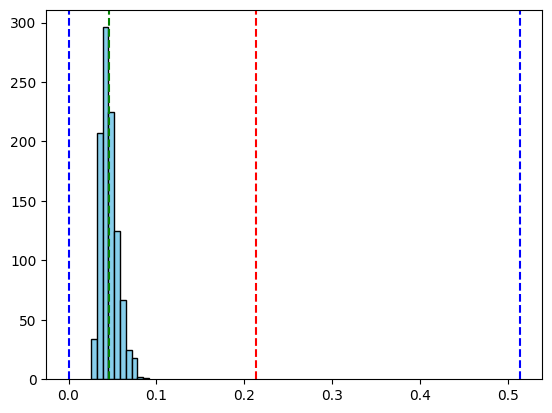

In [ ]:
# Sensitivity Analysis
plot_distributions(sens_df)

100%|██████████| 1000/1000 [00:00<00:00, 3408.84it/s]


Mean of top 30 features: 22.82227553333333
Mean of random features: 6.211710848768667
percentage: 49.29 %


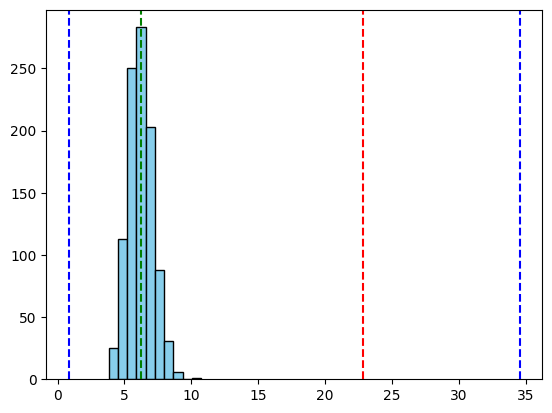

In [ ]:
# Gradient Saliency Analysis
plot_distributions(grad_df)

100%|██████████| 1000/1000 [00:00<00:00, 2820.96it/s]


Mean of top 30 features: 0.8996783546666668
Mean of random features: 0.4989036063633
percentage: 43.21 %


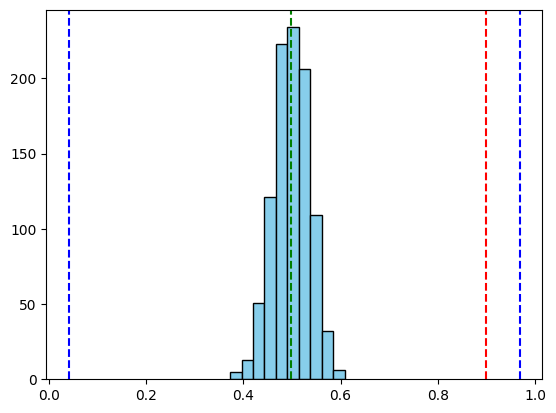

In [ ]:
# Graph Masking Analysis
plot_distributions(graph_df)

100%|██████████| 1000/1000 [00:00<00:00, 2496.24it/s]


Mean of top 30 features: 0.029621984666666667
Mean of random features: 0.022344744619633334
percentage: 41.91 %


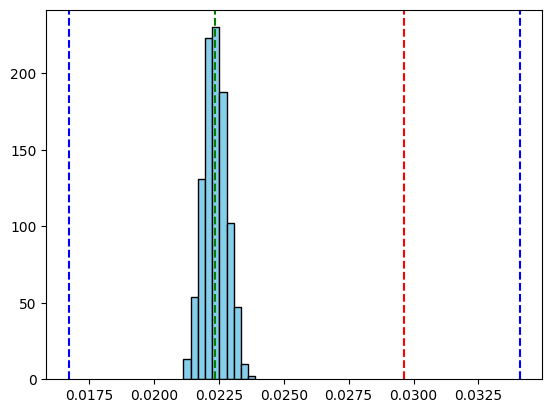

In [ ]:
# SHAP Analysis
plot_distributions(shap_df)